## BestBuy Product Review Scraper

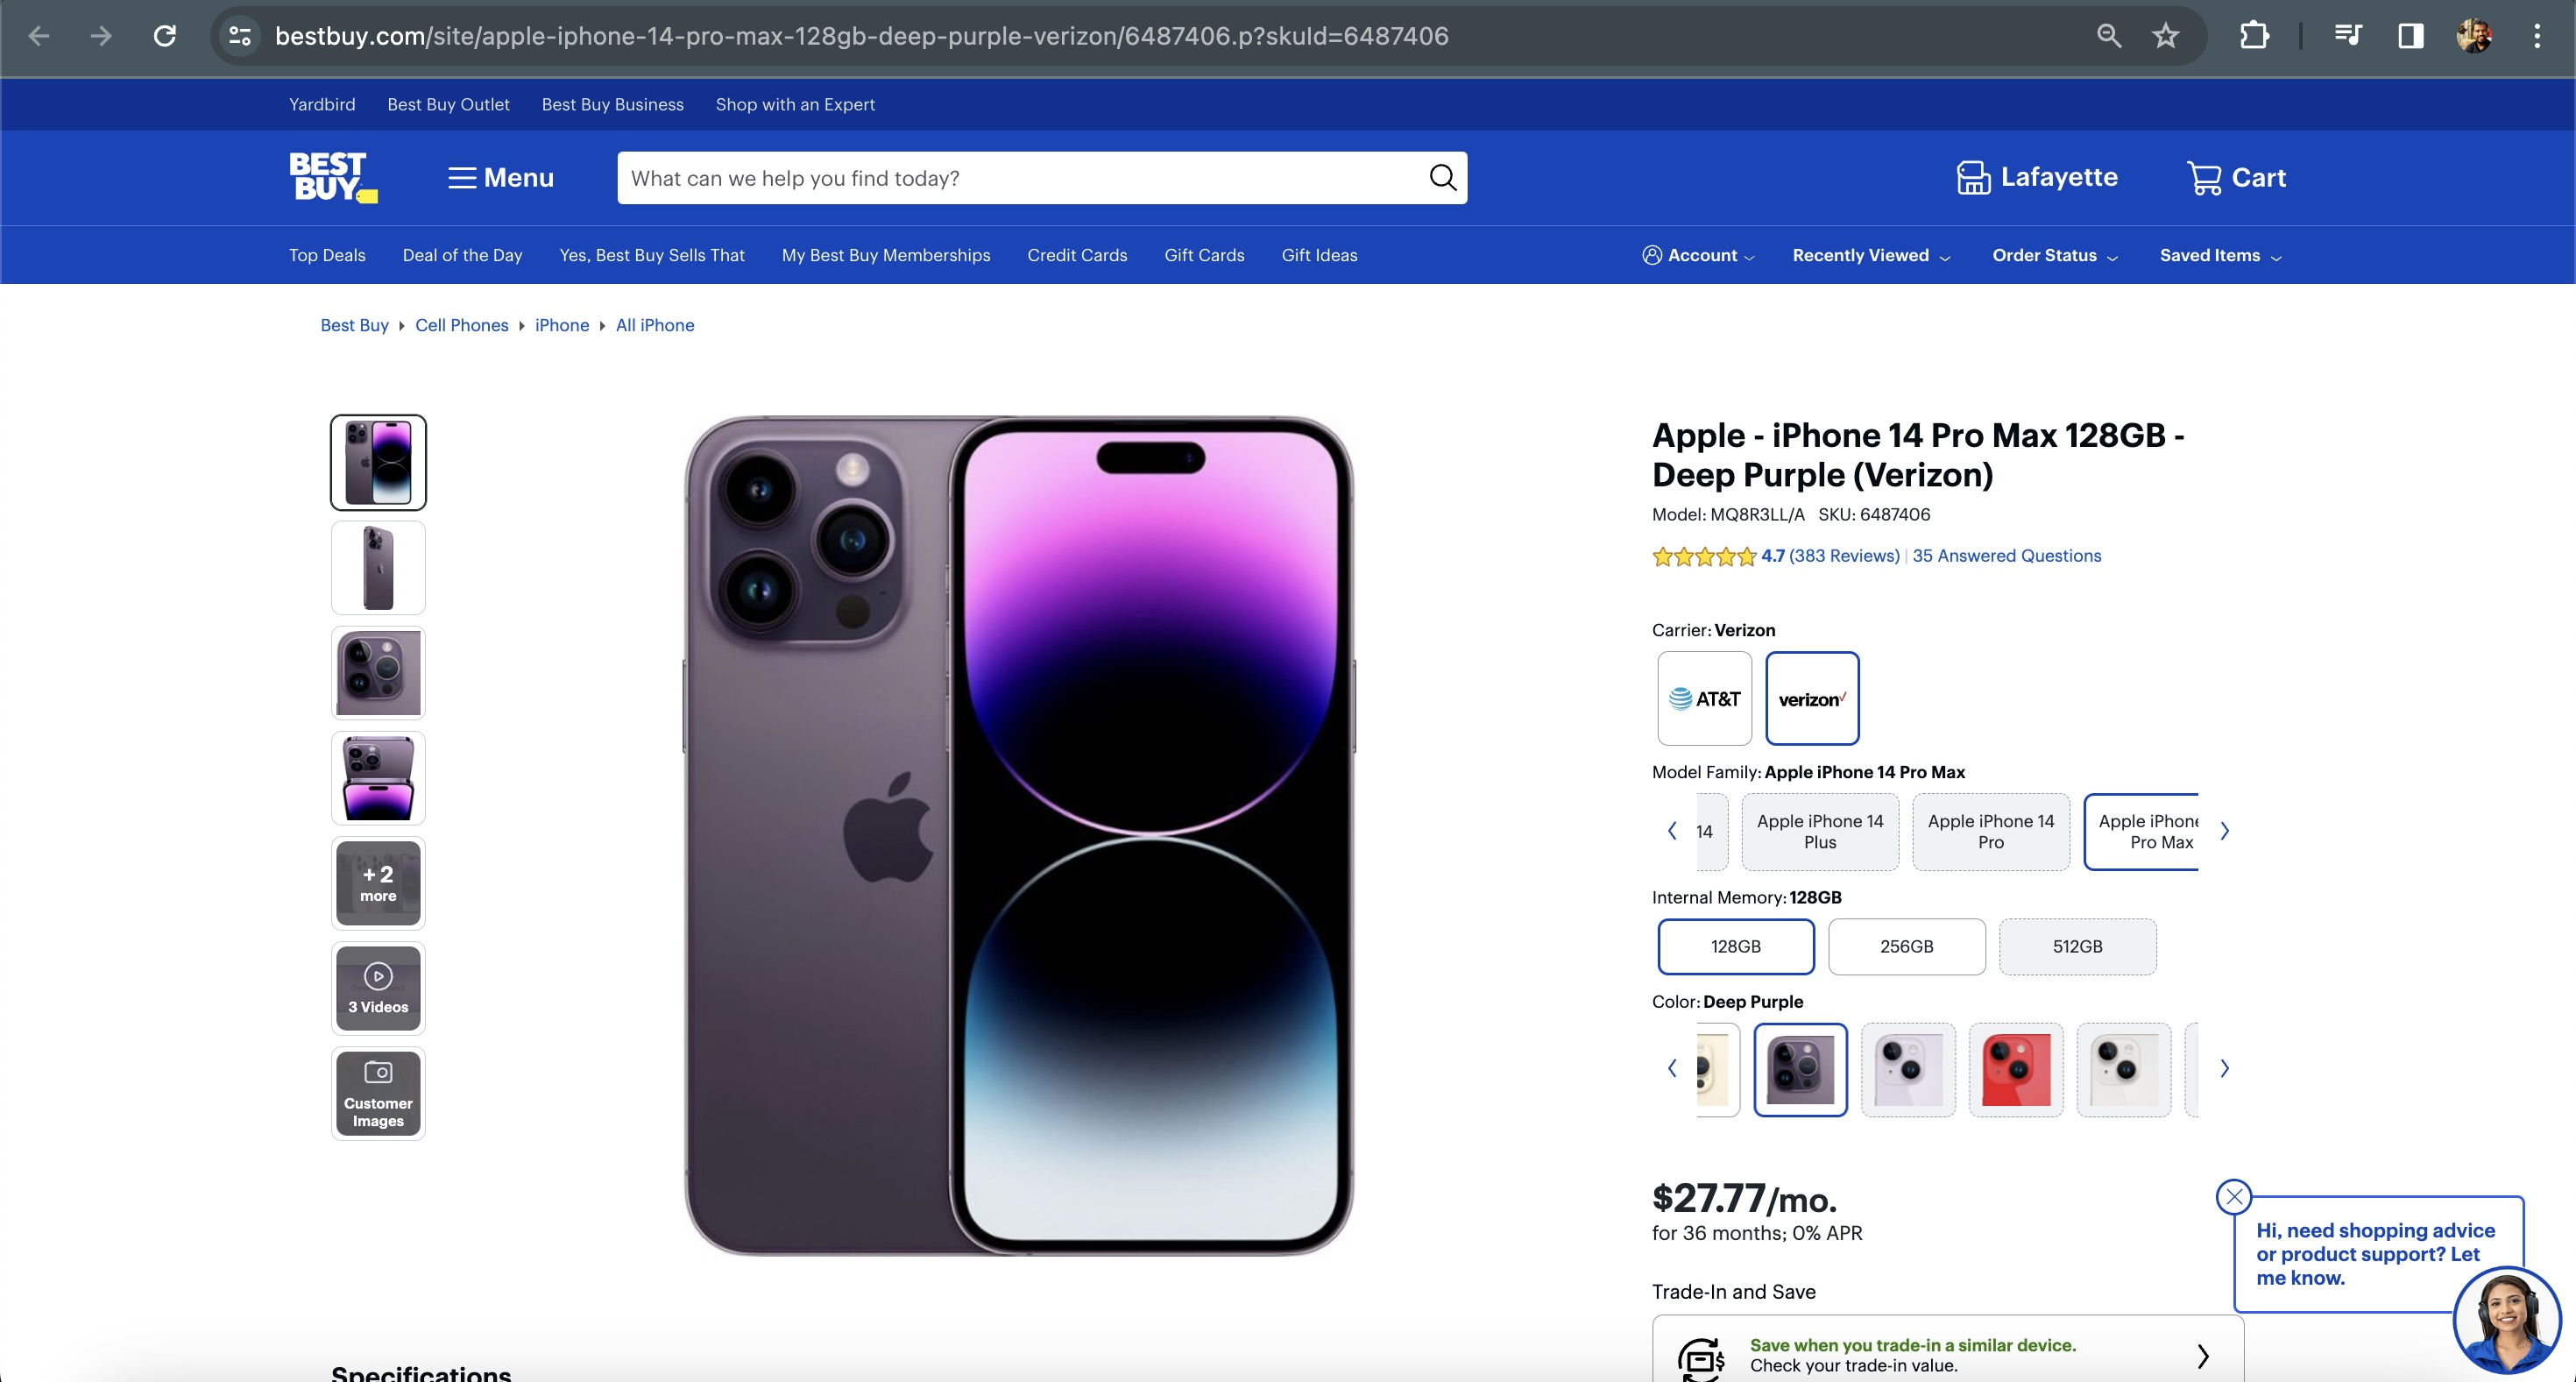

In [3]:
from IPython.display import Image
Image(filename='Files_Directory/Images/bestbuy-1.jpeg',width=900,height=10)

#### The input url for Apple - iPhone 14 Pro Max 128GB - Deep Purple (Verizon), is as follows:  

In [7]:
product_urls = ["https://www.bestbuy.com/site/apple-iphone-14-pro-max-128gb-deep-purple-verizon/6487406.p?skuId=6487406", "https://www.bestbuy.com/site/macbook-air-13-6-laptop-apple-m2-chip-8gb-memory-256gb-ssd-midnight/6509650.p?skuId=6509650"]

## Import Required Libraries

In [2]:
import urllib.request
import json
import csv
import requests
import random

## Browser Headers to Randomize Requests

In [3]:
headers_list = [
    # Firefox 77 Mac
    {
    "User-Agent": "Mozilla/5.0 (Macintosh; Intel Mac OS X 10.15; rv:77.0) Gecko/20100101 Firefox/77.0",
    "Accept": "text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,*/*;q=0.8",
    "Accept-Language": "en-US,en;q=0.5",
    "Referer": "https://www.google.com/",
    "DNT": "1",
    "Connection": "keep-alive",
    "Upgrade-Insecure-Requests": "1"
    },
    # Chrome 92.0 Win10
    {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/92.0.4515.107 Safari/537.36",
    "Accept": "text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,*/*;q=0.8",
    "Accept-Language": "en-US,en;q=0.5",
    "Accept-Encoding": "gzip, deflate, br",
    "Referer": "https://www.google.com/",
    "DNT": "1",
    "Connection": "keep-alive",
    "Upgrade-Insecure-Requests": "1"
    },
    # Chrome 91.0 Win10
    {
    "Connection": "keep-alive",
    "DNT": "1",
    "Upgrade-Insecure-Requests": "1",
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36",
    "Accept": "text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9",
    "Sec-Fetch-Site": "none",
    "Sec-Fetch-Mode": "navigate",
    "Sec-Fetch-Dest": "document",
    "Referer": "https://www.google.com/",
    "Accept-Encoding": "gzip, deflate, br",
    "Accept-Language": "en-GB,en-US;q=0.9,en;q=0.8"
    },
    # Firefox 90.0 Win10
    {
    "Connection": "keep-alive",
    "Upgrade-Insecure-Requests": "1",
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:90.0) Gecko/20100101 Firefox/90.0",
    "Accept": "text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9",
    "Sec-Fetch-Site": "same-origin",
    "Sec-Fetch-Mode": "navigate",
    "Sec-Fetch-User": "?1",
    "Sec-Fetch-Dest": "document",
    "Referer": "https://www.google.com/",
    "Accept-Encoding": "gzip, deflate, br",
    "Accept-Language": "en-US,en;q=0.9"
    }
]

## Function to Extract Reviews

In [15]:
for link in product_urls:
    
    index = link.find('.p?')
    review_page_url = link[:index].replace('www.bestbuy.com/site','www.bestbuy.com/site/reviews')
    print(review_page_url)
    headers = random.choice(headers_list)
    r = requests.Session()
    r.headers = headers
    html = r.get(review_page_url).text
    
    Review_dict_list = []
    
    index = html.find("class=\"reviews-list\"")
    html2 = html[index:]
    
    while html2.find("class=\"review-item\" tabindex=\"-1\"") != -1:
        
        index = html2.find("application/ld+json")
        remaining = html2[index:]
        
        start = remaining.find('>')
        end = remaining.find('<')
        Review_dict_list.append(json.loads(remaining[start+1:end]))
        
        html2 = remaining[end:]
        
    product_name = []
    usernames = []
    reviews = []
    for i in range(len(Review_dict_list)):
        product_name.append(Review_dict_list[i]['itemReviewed']['name'])
        usernames.append(Review_dict_list[i]['author']['name'])
        reviews.append(Review_dict_list[i]['name']+'|'+Review_dict_list[i]['reviewBody'])
    
    
    link_parts = link.split('/')
    cleaned_product_name = link_parts[-2]
     
    file_name = cleaned_product_name +"_reviews.csv"

    # Combine the lists into a list of rows
    rows = zip(product_name, usernames, reviews)
    with open(file_name, mode='w', newline='', encoding = 'utf-8') as file:
        # Create a CSV writer object
        writer = csv.writer(file)
        header = ["product_name", "username", "review(Title|Body)" ]
        writer.writerow(header)

        # Write the data rows
        writer.writerows(rows)

        print(f"CSV file '{file_name}' has been created.")   
    

https://www.bestbuy.com/site/reviews/apple-iphone-14-pro-max-128gb-deep-purple-verizon/6487406
CSV file 'apple-iphone-14-pro-max-128gb-deep-purple-verizon_reviews.csv' has been created.
https://www.bestbuy.com/site/reviews/macbook-air-13-6-laptop-apple-m2-chip-8gb-memory-256gb-ssd-midnight/6509650
CSV file 'macbook-air-13-6-laptop-apple-m2-chip-8gb-memory-256gb-ssd-midnight_reviews.csv' has been created.
